# Introduction

In [1]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from HANCGovModel import HANCGovModelClass

# Setup

In [2]:
model = HANCGovModelClass(name='baseline')

In [3]:
par = model.par
ss = model.ss

# Find stationary equilibrium

In [4]:
model.find_ss(tau=0.001,do_print=True,r_min=1e-8)

### step 1: broad search ###

household problem in ss solved in 4.1 secs [223 iterations]
household problem in ss simulated in 4.2 secs [225 iterations]
clearing_B = -99999.82671551

household problem in ss solved in 0.2 secs [249 iterations]
household problem in ss simulated in 0.0 secs [263 iterations]
clearing_B =   0.04328562

household problem in ss solved in 0.2 secs [279 iterations]
household problem in ss simulated in 0.0 secs [312 iterations]
clearing_B =   0.30000573

household problem in ss solved in 0.2 secs [315 iterations]
household problem in ss simulated in 0.0 secs [379 iterations]
clearing_B =   0.55887530

household problem in ss solved in 0.3 secs [359 iterations]
household problem in ss simulated in 0.0 secs [470 iterations]
clearing_B =   0.92682552

household problem in ss solved in 0.3 secs [411 iterations]
household problem in ss simulated in 0.0 secs [615 iterations]
clearing_B =   1.51681677

household problem in ss solved in 0.3 secs [474 iterations]
househo

# Vary taxation level

In [5]:
def target(tau):
    
    model.find_ss(tau)
    return -ss.U_hh

res = optimize.minimize_scalar(target,bounds=(0.0,0.1),method='bounded',options={'disp':3})

 
 Func-count     x          f(x)          Procedure
    1      0.0381966      1.12765        initial
    2      0.0618034      1.12916        golden
    3      0.0236068      1.12743        golden
    4      0.0252331      1.12741        parabolic
    5      0.0272096      1.12741        parabolic
    6       0.026714      1.12741        parabolic
    7       0.026747      1.12741        parabolic
    8      0.0267375      1.12741        parabolic
    9      0.0267342      1.12741        parabolic
   10      0.0267408      1.12741        parabolic

Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol =  1e-05 )


In [6]:
taus = [0.0,0.001,0.005,0.01,0.025,0.05,0.1]
U_hh = np.zeros(len(taus))
B = np.zeros(len(taus))
r = np.zeros(len(taus))

for i,tau in enumerate(taus):
    
    model.find_ss(tau=tau,do_print=False)
    
    print(f'{ss.r = :8.3f}')
    print(f'{ss.B = :8.3f}')
    print(f'{ss.U_hh = :12.8f}\n')
    
    U_hh[i] = ss.U_hh
    B[i] = ss.B
    r[i] = ss.r

ss.r =    0.000
ss.B =    0.173
ss.U_hh =  -1.13196084

ss.r =    0.004
ss.B =    0.255
ss.U_hh =  -1.13101342

ss.r =    0.010
ss.B =    0.478
ss.U_hh =  -1.12927390

ss.r =    0.014
ss.B =    0.696
ss.U_hh =  -1.12829248

ss.r =    0.020
ss.B =    1.235
ss.U_hh =  -1.12741594

ss.r =    0.025
ss.B =    2.005
ss.U_hh =  -1.12827130

ss.r =    0.030
ss.B =    3.374
ss.U_hh =  -1.13320391



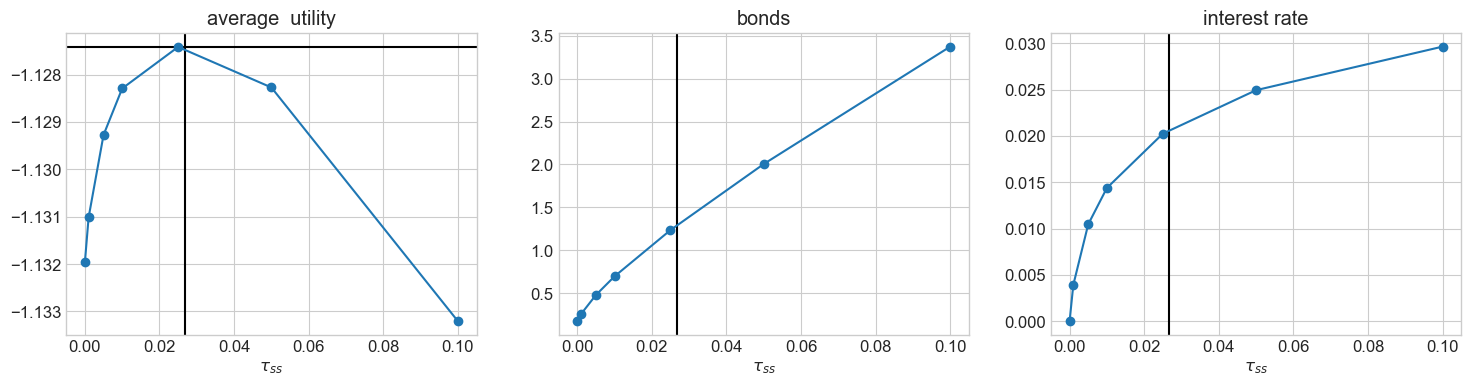

In [7]:
fig = plt.figure(figsize=(18,6/1.5),dpi=100)

ax = fig.add_subplot(1,3,1)
ax.set_title('average  utility')
ax.axvline(res.x,color='black')
ax.axhline(-res.fun,color='black')
ax.plot(taus,U_hh,'-o')
ax.set_xlabel('$\\tau_{ss}$')

ax = fig.add_subplot(1,3,2)
ax.set_title('bonds')
ax.axvline(res.x,color='black')
ax.plot(taus,B,'-o')
ax.set_xlabel('$\\tau_{ss}$')

ax = fig.add_subplot(1,3,3)
ax.set_title('interest rate')
ax.axvline(res.x,color='black')
ax.plot(taus,r,'-o')
ax.set_xlabel('$\\tau_{ss}$');